<a href="https://colab.research.google.com/github/Code-Xiang/DeepLearning/blob/main/test_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.6/817.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.4/110.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset

<Axes: xlabel='Month'>

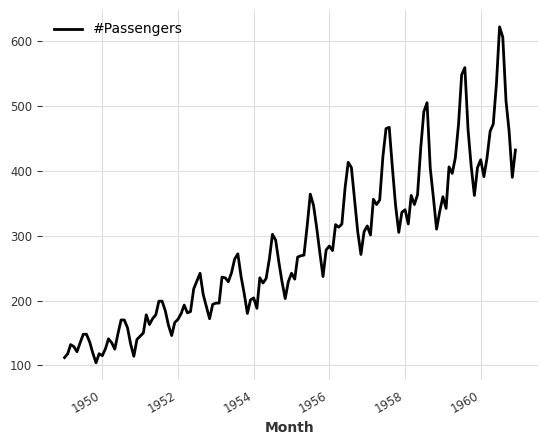

In [3]:
series = AirPassengersDataset().load()
series.plot()

<Axes: xlabel='Month'>

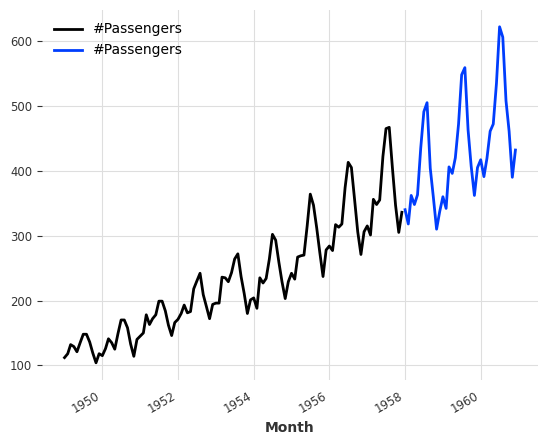

In [4]:
series1, series2 = series.split_after(0.75)
series1.plot()
series2.plot()

In [12]:
!pip install keras-tcn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 15.2 MB/s eta 0:00:00


In [13]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib.pylab import mpl
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
from keras.layers import LeakyReLU
from tcn import TCN,tcn_full_summary
from sklearn.metrics import mean_squared_error # 均方误差
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
from tensorflow.keras import Input, Model,Sequential



In [14]:
mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']=False       #显示负号

In [31]:
data=pd.read_csv('cpi_train.csv',encoding ='utf-8',parse_dates=['datetime'])

# Date=pd.to_datetime(data.datetime)
# data['date'] = Date.map(lambda x: x.strftime('%Y-%m-%d'))

Date = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
# 创建一个新的 'date' 列，其中包含将 'datetime' 列中的日期时间格式转换为字符串格式 '%Y-%m-%d' 的结果
data['date'] = Date.map(lambda x: x.strftime('%Y-%m-%d'))

datanew=data.set_index(Date)
series = pd.Series(datanew['全国'].values, index=datanew['date'])

In [32]:
series

date
2000-01-01     99.8
2000-02-01    100.7
2000-03-01     99.8
2000-04-01     99.7
2000-05-01    100.1
              ...  
2023-07-01     99.7
2023-08-01    100.1
2023-09-01    100.0
2023-10-01     99.8
2023-11-01     99.5
Length: 287, dtype: float64

In [33]:
dataframe1 = pd.DataFrame()
num_hour = 16
for i in range(num_hour,0,-1):
    dataframe1['t-'+str(i)] = series.shift(i)
dataframe1['t'] = series.values
dataframe3=dataframe1.dropna()
dataframe3.index=range(len(dataframe3))

,t-16,t-15,t-14,t-13,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,4972.0,4902.0,4843.0,4750.0,4654.0,4509.0,4329.0,4104.0,4459.0,5043.0,5239.0,5118.0,4984.0,4904.0,4822.0,4728.0,4464
1,4902.0,4843.0,4750.0,4654.0,4509.0,4329.0,4104.0,4459.0,5043.0,5239.0,5118.0,4984.0,4904.0,4822.0,4728.0,4464.0,4265
2,4843.0,4750.0,4654.0,4509.0,4329.0,4104.0,4459.0,5043.0,5239.0,5118.0,4984.0,4904.0,4822.0,4728.0,4464.0,4265.0,4161
3,4750.0,4654.0,4509.0,4329.0,4104.0,4459.0,5043.0,5239.0,5118.0,4984.0,4904.0,4822.0,4728.0,4464.0,4265.0,4161.0,4091
4,4654.0,4509.0,4329.0,4104.0,4459.0,5043.0,5239.0,5118.0,4984.0,4904.0,4822.0,4728.0,4464.0,4265.0,4161.0,4091.0,3964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,1939.0,1967.0,1670.0,1532.0,1343.0,1022.0,813.0,1420.0,1359.0,1075.0,1015.0,917.0,1550.0,1420.0,1358.0,2893.0,3179
917,1967.0,1670.0,1532.0,1343.0,1022.0,813.0,1420.0,1359.0,1075.0,1015.0,917.0,1550.0,1420.0,1358.0,2893.0,3179.0,3071
918,1670.0,1532.0,1343.0,1022.0,813.0,1420.0,1359.0,1075.0,1015.0,917.0,1550.0,1420.0,1358.0,2893.0,3179.0,3071.0,4095
919,1532.0,1343.0,1022.0,813.0,1420.0,1359.0,1075.0,1015.0,917.0,1550.0,1420.0,1358.0,2893.0,3179.0,3071.0,4095.0,3825


In [34]:
pd.DataFrame(np.random.shuffle(dataframe3.values))  #shuffle
pot=len(dataframe3)-12
train=dataframe3[:pot]
test=dataframe3[pot:]
scaler = MinMaxScaler(feature_range=(0, 1)).fit(train)
#scaler = preprocessing.StandardScaler().fit(train)
train_norm=pd.DataFrame(scaler.fit_transform(train))
test_norm=pd.DataFrame(scaler.transform(test))
X_train=train_norm.iloc[:,:-1]
X_test=test_norm.iloc[:,:-1]
Y_train=train_norm.iloc[:,-1:]
Y_test=test_norm.iloc[:,-1:]

source_x_train=X_train
source_x_test=X_test
X_train=X_train.values.reshape([X_train.shape[0],1,X_train.shape[1]]) #从(909,16)-->(909,1,16)
X_test=X_test.values.reshape([X_test.shape[0],1,X_test.shape[1]])  #从(12,16)-->(12,1,16)
Y_train=Y_train.values
Y_test=Y_test.values

In [35]:
def scheduler(epoch):
    # 每隔50个epoch，学习率减小为原来的1/10
    if epoch % 50 == 0 and epoch != 0:
        lr = K.get_value(tcn.optimizer.lr)
        if lr>1e-5:
            K.set_value(tcn.optimizer.lr, lr * 0.1)
            print("lr changed to {}".format(lr * 0.1))
    return K.get_value(tcn.optimizer.lr)
#计算指定置信水平下的预测准确率
#level为小数
def comput_acc(real,predict,level):
    num_error=0
    for i in range(len(real)):
        if abs(real[i]-predict[i])/real[i]>level:
            num_error+=1
    return 1-num_error/len(real)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 64)                141632    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 16)               

<ipython-input-36-6335a59f5330>:49: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.savefig("loss图.png")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


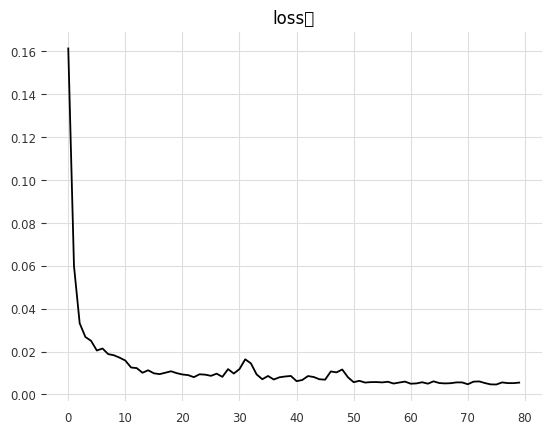

1/1 [==============================] - 1s 573ms/step


<ipython-input-36-6335a59f5330>:74: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  plt.savefig("真实值预测值走势图.png")
<ipython-input-36-6335a59f5330>:74: UserWarning: Glyph 38480 (\N{CJK UNIFIED IDEOGRAPH-9650}) missing from current font.
  plt.savefig("真实值预测值走势图.png")
<ipython-input-36-6335a59f5330>:74: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  plt.savefig("真实值预测值走势图.png")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38480 (\N{CJK UNIFIED IDEOGRAPH-9650}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from cur

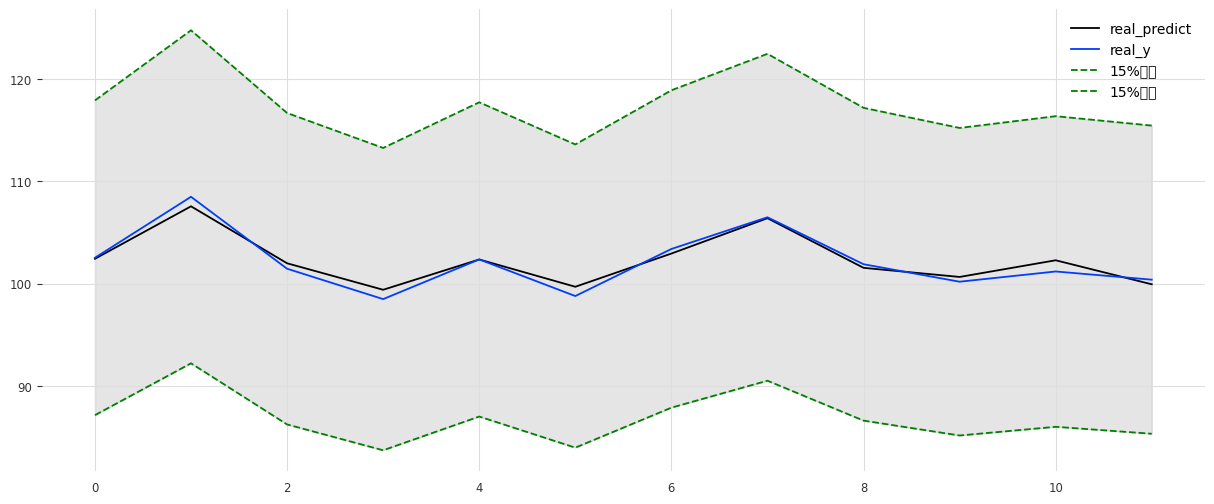

mse: 0.0036
r2_score: 0.9492
avg_per_real_loss: 0.005162032078969831


In [36]:
reduce_lr = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='loss',
                               patience=20,
                               min_delta=1e-5,
                               mode='auto',
                               restore_best_weights=False,#是否从具有监测数量的最佳值的时期恢复模型权重
                               verbose=2)

# 构造TCN模型
batch_size=None
timesteps=X_train.shape[1]
input_dim=X_train.shape[2] #输入维数
tcn = Sequential()
input_layer =Input(batch_shape=(batch_size,timesteps,input_dim))
tcn.add(input_layer)
tcn.add(TCN(nb_filters=64, #在卷积层中使用的过滤器数。可以是列表。
        kernel_size=3, #在每个卷积层中使用的内核大小。
        nb_stacks=1,   #要使用的残差块的堆栈数。
        dilations=[2 ** i for i in range(6)], #扩张列表。示例为：[1、2、4、8、16、32、64]。
        #用于卷积层中的填充,值为'causal' 或'same'。
        #“causal”将产生因果（膨胀的）卷积，即output[t]不依赖于input[t+1：]。当对不能违反时间顺序的时序信号建模时有用。
        #“same”代表保留边界处的卷积结果，通常会导致输出shape与输入shape相同。
        padding='causal',
        use_skip_connections=True, #是否要添加从输入到每个残差块的跳过连接。
        dropout_rate=0.1, #在0到1之间浮动。要下降的输入单位的分数。
        return_sequences=False,#是返回输出序列中的最后一个输出还是完整序列。
        activation='relu', #残差块中使用的激活函数 o = Activation(x + F(x)).
        kernel_initializer='he_normal', #内核权重矩阵（Conv1D）的初始化程序。
        # use_batch_norm=True, #是否在残差层中使用批处理规范化。
        use_layer_norm=True, #是否在残差层中使用层归一化。
        name='tcn' #使用多个TCN时，要使用唯一的名称
        ))
tcn.add(tf.keras.layers.Dense(64))
tcn.add(tf.keras.layers.LeakyReLU(alpha=0.3))
tcn.add(tf.keras.layers.Dense(32))
tcn.add(tf.keras.layers.LeakyReLU(alpha=0.3))
tcn.add(tf.keras.layers.Dense(16))
tcn.add(tf.keras.layers.LeakyReLU(alpha=0.3))
tcn.add(tf.keras.layers.Dense(1))
tcn.add(tf.keras.layers.LeakyReLU(alpha=0.3))
tcn.compile('adam', loss='mse', metrics=['accuracy'])
tcn.summary()

history=tcn.fit(X_train,Y_train, epochs=80,batch_size=32,callbacks=[reduce_lr])

history.history.keys() #查看history中存储了哪些参数
plt.title("loss图")
plt.plot(history.epoch,history.history.get('loss')) #画出随着epoch增大loss的变化图
plt.savefig("loss图.png")
plt.show()
#plt.plot(history.epoch,history.history.get('acc'))#画出随着epoch增大准确率的变化图

predict = tcn.predict(X_test)
real_predict=scaler.inverse_transform(np.concatenate((source_x_test,predict),axis=1))
real_y=scaler.inverse_transform(np.concatenate((source_x_test,Y_test),axis=1))
real_predict=real_predict[:,-1]
real_y=real_y[:,-1]

plt.figure(figsize=(15,6))
bwith = 0.75 #边框宽度设置为2
ax = plt.gca()#获取边框
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
plt.plot(real_predict,label='real_predict')
plt.plot(real_y,label='real_y')
plt.plot(real_y*(1+0.15),label='15%上限',linestyle='--',color='green')
# plt.plot(real_y*(1+0.1),label='10%上限',linestyle='--')
# plt.plot(real_y*(1-0.1),label='10%下限',linestyle='--')
plt.plot(real_y*(1-0.15),label='15%下限',linestyle='--',color='green')
plt.fill_between(range(0,12),real_y*(1+0.15),real_y*(1-0.15),color='gray',alpha=0.2)
plt.legend()
plt.savefig("真实值预测值走势图.png")
plt.show()

print("mse:",round(mean_squared_error(Y_test,predict),4))
from sklearn.metrics import r2_score
print("r2_score:",round(r2_score(real_y,real_predict),4))

per_real_loss=(real_y-real_predict)/real_y
avg_per_real_loss=sum(abs(per_real_loss))/len(per_real_loss)
print("avg_per_real_loss:",avg_per_real_loss)